# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [50]:
#include <iostream>
#include <string>
#include <stdio.h>
#include <cmath>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root"); 

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will explore two jet types: "Reco" (reconstructed from the calorimeter) and "Truth"(particle level). Activate "Event Weight". 

In [4]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

Create Canvas

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Create histograms: Leading jet pT and all jets pT 

In [6]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);

Loop and fill histograms

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


<p>Draw</p>

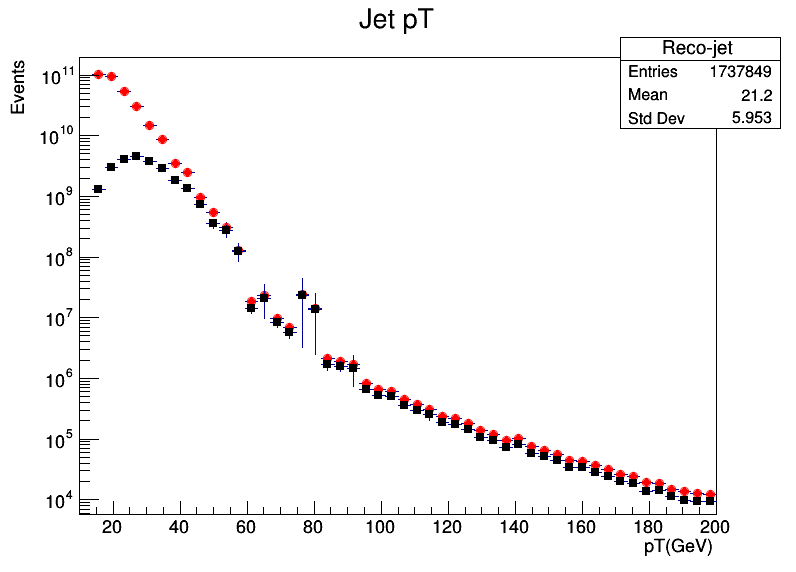

In [8]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b>Excercises: 
    1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.
    2. Repeat for all jets pT.
</b>

Now we will study the jets pileup dependence 

In [9]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

Plot jet pt vs. pileup

In [10]:
TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);


Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [11]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [12]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

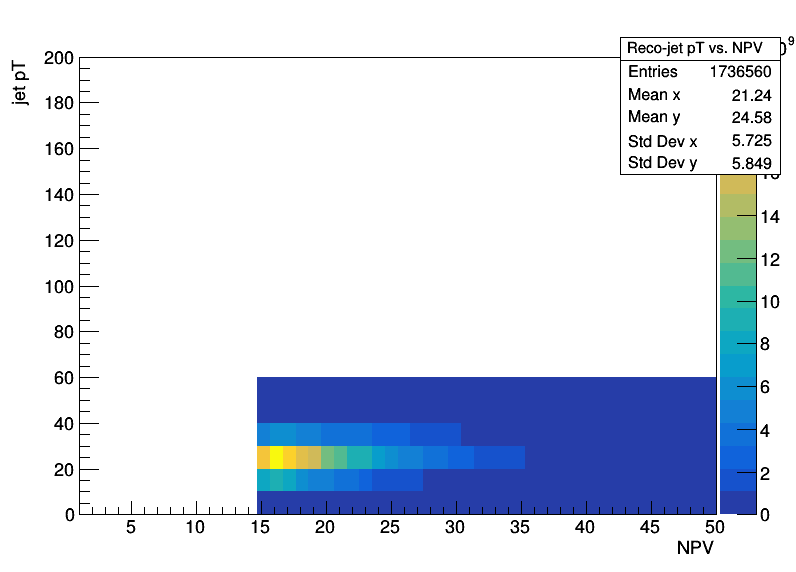

In [13]:
hist_jetpt_npv->Draw("colz");
canvas2->Draw();

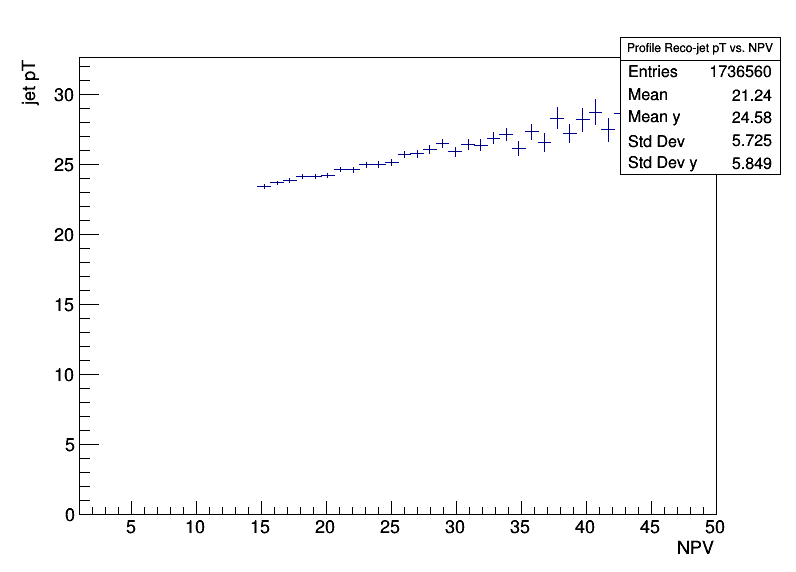

In [14]:
prof_jetpt_npv->Draw("");
canvas2->Draw();

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

Plot the JVF (Jet Vertex Fraction) variable

In [15]:
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

In [16]:
TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet JVF (Potential memory leak).


In [17]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
        
    }
}

std::cout << "Done!" << std::endl;

Done!


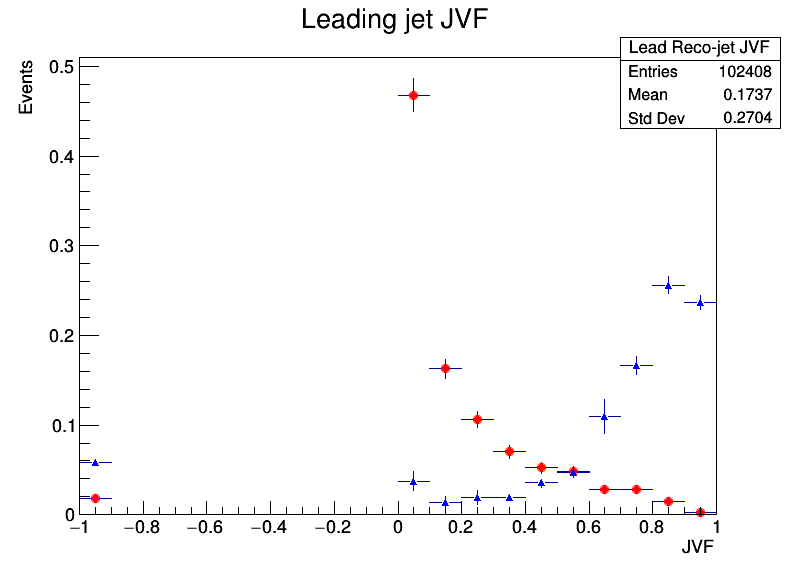

In [18]:
hist_leadreco_jvf->SetMarkerStyle(20);
hist_leadreco_jvf->SetMarkerColor(kRed);
hist_leadreco_jvf->DrawNormalized("");
hist_leadreco100_jvf->SetMarkerStyle(22);
hist_leadreco100_jvf->SetMarkerColor(kBlue);
hist_leadreco100_jvf->DrawNormalized("same");
canvas2->Draw();

<b>Excercise: 
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [19]:
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);

In [20]:
TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);

In [21]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;


Done!


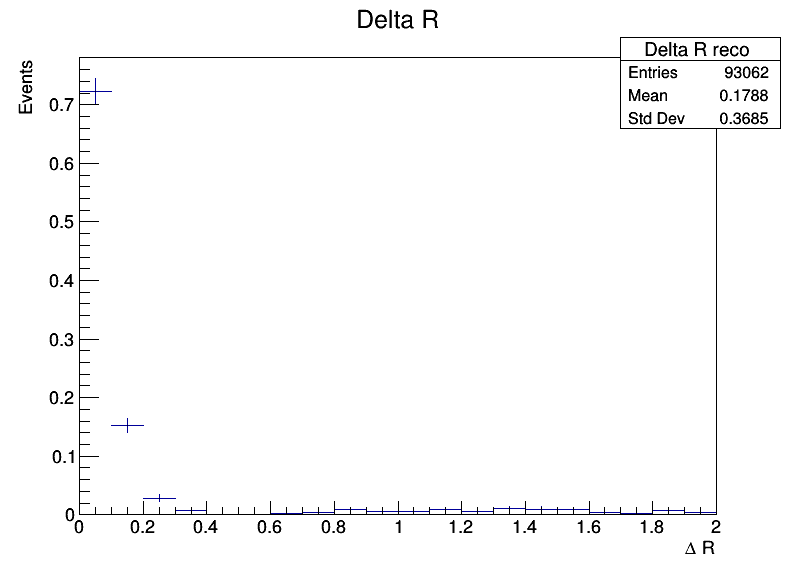

In [22]:
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->DrawNormalized("");
canvas2->Draw();

<b>Excercise: 
6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 
</b>

<b>Excercises: 
7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).
8. Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.  

</b>

# Excercise

<b>
1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.
    </b>

In [23]:
TCanvas *canvas11 = new TCanvas("Canvas11","", 800,600);

In [24]:
TH1F *hi_leadreco_pt = new TH1F("Lead reco jet pt", "Lead reco jet pt; pT(GeV); Events", 40, 10, 300);
TH1F *hi_leadreco_pt_we = new TH1F("Lead reco jet pt weight", "Lead reco jet pt_weight; pT(GeV); Events", 40, 10, 300);
TH1F *hi_leadtru_pt = new TH1F("Lead truth jet pt", "Lead truth jet pt; pT(GeV); Events", 40,10,300);
TH1F *hi_leadtru_pt_we = new TH1F("Lead truth jet pt weight", "Lead truth jet pt_weight; pT(GeV); Events", 40,10,300);

In [25]:
TH1F *hi_reco_pt = new TH1F("reco jet pt","reco jet; pT(GeV), Events", 40,10,300);
TH1F *hi_reco_pt_we = new TH1F("reco jet pt weight", "reco jet weight; pT(GeV), Events", 40, 10, 300);
TH1F *hi_tru_pt = new TH1F("truth jet pt","truth jet; pT(GeV), Events", 40,10,300);
TH1F *hi_tru_pt_we = new TH1F("truth jet pt weight", "truth jet weight; pT(GeV), Events", 40, 10, 300);
//-----------------------TrackJets_R4_pt-----------------------------------
TH1F *hi_tra_pt = new TH1F("Track jet pt", "track jet; pT(GeV), Events", 40,10,300);
TH1F *hi_tra_pt_we = new TH1F("Track jet pt weight", "track jet weight; pT(GeV), Events", 40,10,300);
TH1F *hi_leadtra_pt = new TH1F("Lead Track jet pt weight", "track jet weight; pT(GeV), Events", 40,10,300);
TH1F *hi_leadtra_pt_we = new TH1F("Lead Track jet pt weight", "track jet weight; pT(GeV), Events", 40,10,300);


Warning in <TFile::Append>: Replacing existing TH1: Lead Track jet pt weight (Potential memory leak).


In [26]:
int nentries, nbytes;
nentries = (Int_t)tree->GetEntries();
for (int i = 0; i<nentries; i++){
    
    nbytes = tree->GetEntry(i);
    if (reco_R4_pt->size()>0){
        hi_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.);
        hi_leadreco_pt_we->Fill(reco_R4_pt->at(0)/1000.,evtw);
        /*for(int j=0; j<reco_R4_pt->size(); j++){
            hi_reco_pt->Fill(reco_R4_pt->at(j)/1000.); 
            hi_reco_pt_we->Fill(reco_R4_pt->at(j)/1000., evtw);
        
    }*/
    }
    
    if (truth_R4_pt->size()>0){
        hi_leadtru_pt->Fill(truth_R4_pt->at(0)/1000.);
        hi_leadtru_pt_we->Fill(truth_R4_pt->at(0)/1000., evtw);
        /*for(int j=0; j<reco_R4_pt->size(); j++){
            hi_tru_pt->Fill(truth_R4_pt->at(j)/1000.); 
            hi_tru_pt_we->Fill(truth_R4_pt->at(j)/1000., evtw);
        
    } */
    }
    
}

std::cout<<"done"<<std::endl;

done


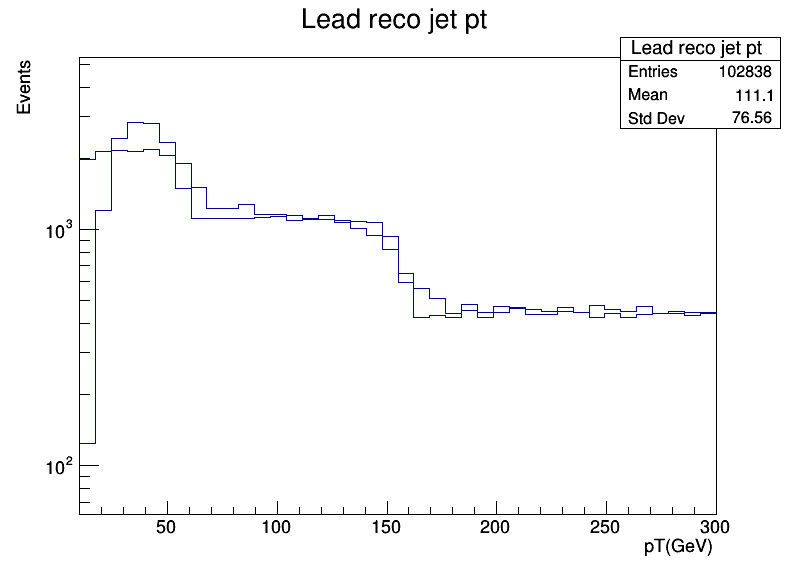

In [27]:
hi_leadreco_pt->SetMarkerStyle(20);
hi_leadreco_pt->SetMarkerColor(30);
hi_leadreco_pt->Draw("");
hi_leadtru_pt->SetMarkerStyle(21);
hi_leadtru_pt->SetMarkerColor(52);
hi_leadtru_pt->Draw("same");

/*
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
*/
canvas11->SetLogy();
canvas11->Draw();

With weights

In [28]:
TCanvas *canvas12 = new TCanvas("Canvas12","Lead with weights", 800,600);

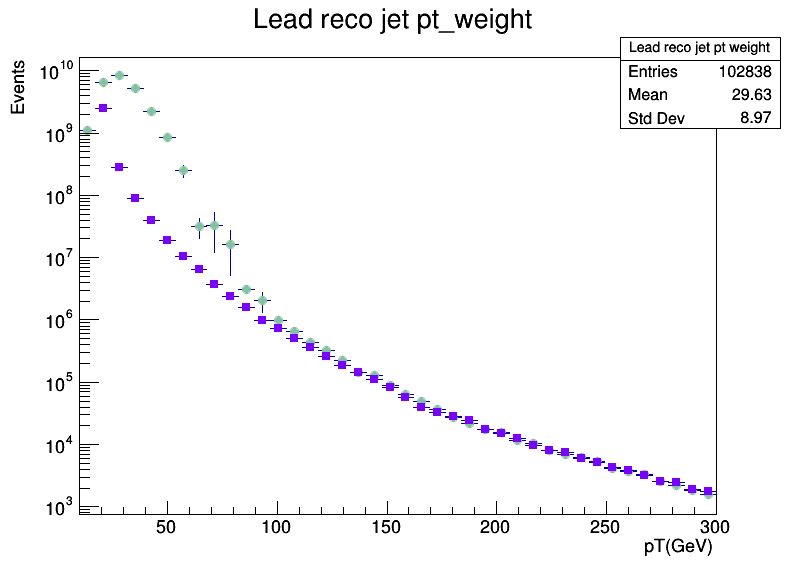

In [29]:
hi_leadreco_pt_we->SetMarkerStyle(20);
hi_leadreco_pt_we->SetMarkerColor(30);
hi_leadreco_pt_we->Draw("");
hi_leadtru_pt_we->SetMarkerStyle(21);
hi_leadtru_pt_we->SetMarkerColor(52);
hi_leadtru_pt_we->Draw("same");

canvas12->SetLogy();
canvas12->Draw();

<b>
    2. Repeat for all jets pT.  (Revisarlo)
    </b> 

In [30]:
vector<float> *tra_R4_pt;

tree->SetBranchAddress("TrackJets_R4_pt", &tra_R4_pt);

In [31]:
for (int i = 0; i<nentries; i++){
    
    nbytes = tree->GetEntry(i);
    if (reco_R4_pt->size()>0){
        //hi_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.);
        //hi_leadreco_pt_we->Fill(reco_R4_pt->at(0)/1000.,evtw);
        for(int j=0; j<reco_R4_pt->size(); j++){
            hi_reco_pt->Fill(reco_R4_pt->at(j)/1000.); 
            hi_reco_pt_we->Fill(reco_R4_pt->at(j)/1000., evtw);
        
    }
    }
    
    if (truth_R4_pt->size()>0){
        //hi_leadtru_pt->Fill(truth_R4_pt->at(0)/1000.);
        //hi_leadtru_pt_we->Fill(truth_R4_pt->at(0)/1000., evtw);
        for(int j=0; j<reco_R4_pt->size(); j++){
            hi_tru_pt->Fill(truth_R4_pt->at(j)/1000.); 
            hi_tru_pt_we->Fill(truth_R4_pt->at(j)/1000., evtw);
        
    }
    }
    
}

std::cout<<"done"<<std::endl;

In [37]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();
for (int i = 0; i<nentries; i++){
    
     nbytes = tree->GetEntry(i);
    if (tra_R4_pt->size()>0){
        hi_leadtra_pt->Fill(tra_R4_pt->at(0)/1000.);
        hi_leadtra_pt_we->Fill(tra_R4_pt->at(0)/1000.,evtw);
        /*for(int j=0; j<reco_R4_pt->size(); j++){
        hi_tra_pt->Fill(tra_R4_pt->at(j)/1000.); 
        hi_tra_pt_we->Fill(tra_R4_pt->at(j)/1000., evtw);
        
    }*/
    }
    
}

std::cout<<"done1"<<std::endl; 

done1


In [33]:
TCanvas *canvas13 = new TCanvas("Canvas13","Jets with weights", 800,600);

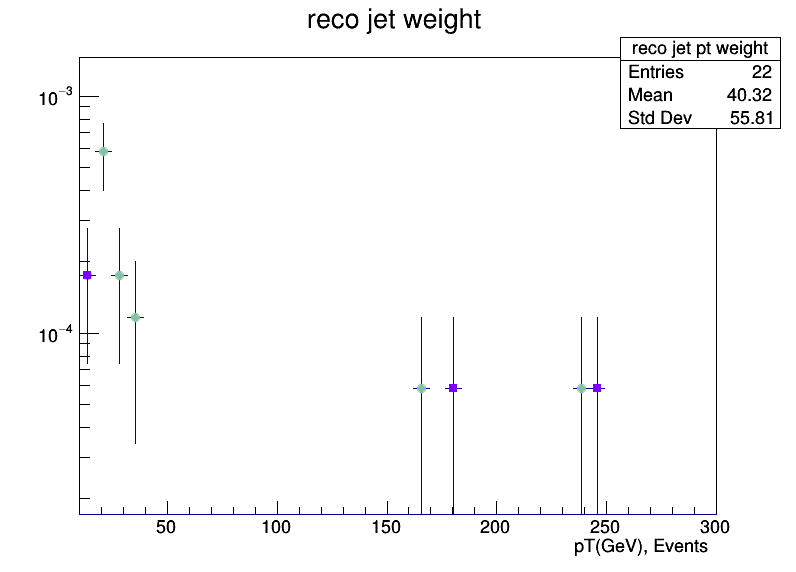

In [34]:
hi_reco_pt_we->SetMarkerStyle(20);
hi_reco_pt_we->SetMarkerColor(30);
hi_reco_pt_we->Draw("");
hi_tru_pt_we->SetMarkerStyle(21);
hi_tru_pt_we->SetMarkerColor(52);
hi_tru_pt_we->Draw("same");
hi_tra_pt_we->SetMarkerStyle(22);
hi_tra_pt_we->SetMarkerColor(77);
hi_tra_pt_we->Draw("same");

canvas13->SetLogy();
canvas13->Draw();

<b>
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

In [45]:
TH2F *hi2_trujet_pt = new TH2F("TruthJets_R4_pt vs NPV", ";NPV; tru jet pT", 50, 1, 50, 20, 0, 200);
TProfile *prof_trujetpt_npv = new TProfile("Profile TruthJet pT  vs NPV", ";NPV; tru jet pT", 50, 1, 50,0,200);

Warning in <TFile::Append>: Replacing existing TH1: TruthJets_R4_pt vs NPV (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Profile TruthJet pT  vs NPV (Potential memory leak).


In [46]:
int nentries, nbytes;
nentries = (Int_t)tree->GetEntries();

for (int i=0; i <nentries; i++){
    
    nbytes = tree->GetEntry(i);
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hi2_trujet_pt->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        prof_trujetpt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}
std::cout<<"done"<<std::endl;

done


In [47]:
TCanvas *canvas15 = new TCanvas("Canvas15", "", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas15


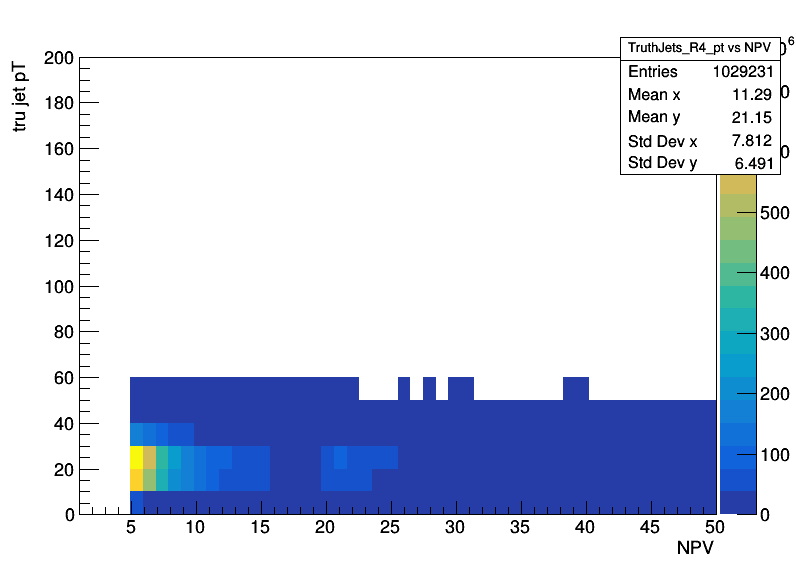

In [48]:
hi2_trujet_pt->Draw("colz");
canvas15->Draw();

Como el histrograma de dos variables no expresa mucho, se realiza uno del perfil.

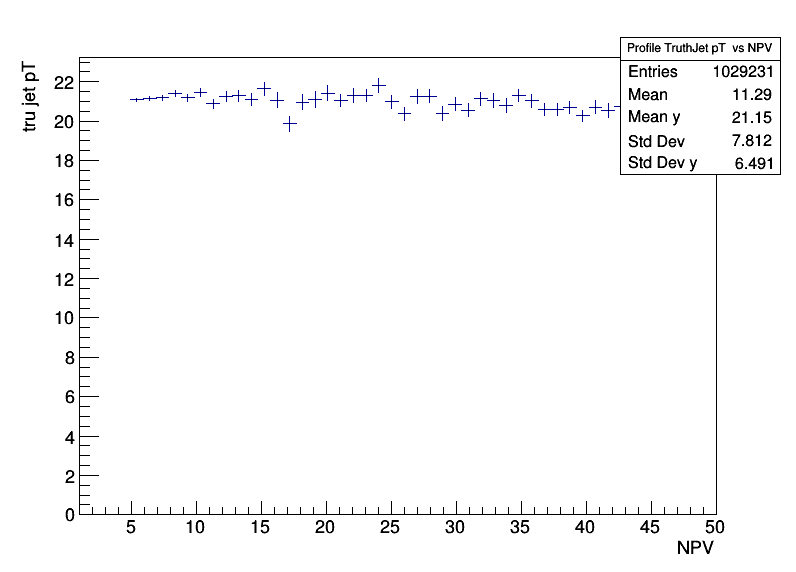

In [53]:
prof_trujetpt_npv->Draw("");
canvas15->Draw();

El perfil indica la

<b>
    4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 


Jet Vertex Fraction (JVF)

In [54]:
TH1F *hi_leadreco_jvf = new TH1F("Lead truthjet_pt JVF", "Leading truthjet JVF; JVF; Events", 50,1,50 );
TH1F *hi_leadreco_jvf2 = new TH1F("Lead truthjet_pt JVF", "Leading truthjet JVF; JVF; Events", 50,1,50 );

Warning in <TFile::Append>: Replacing existing TH1: Lead truthjet_pt JVF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead truthjet_pt JVF (Potential memory leak).


In [61]:
int nentries, nbytes;
nentries = (Int_t)tree->GetEntries();
/*
for (int i=0; i <nentries; i++){
    
    nbytes = tree->GetEntry(i);
    
    if(reco_R4_pt->size()>0){
        hi_leadreco_jvf->Fill(reco_R4_pt->at(0)/1000., evtw);
        if(reco_R4_jvf->at(0)>0.5 && reco_R4_jvf->at(0)<0.5){
            
            hi_leadreco_jvf2->Fill(reco_R4_jvf->at(0), evtw);
        }
     
        
    }
    
}*/

for (int i=0; i <nentries; i++){
    
    nbytes = tree->GetEntry(i);
    
    if(reco_R4_jvf->size()>0.5 && reco_R4_jvf->size()<0.5){
        hi_leadreco_jvf->Fill(reco_R4_pt->at(0)/1000., evtw);
        if(reco_R4_jvf->at(0)>0.5 && reco_R4_jvf->at(0)<0.5){
            
            hi_leadreco_jvf2->Fill(reco_R4_jvf->at(0), evtw);
        }
     
        
    }
    
}


std::cout<<"done"<<std::endl;

done


In [62]:
TCanvas *canvas16 = new TCanvas("Canvas16", "", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas16


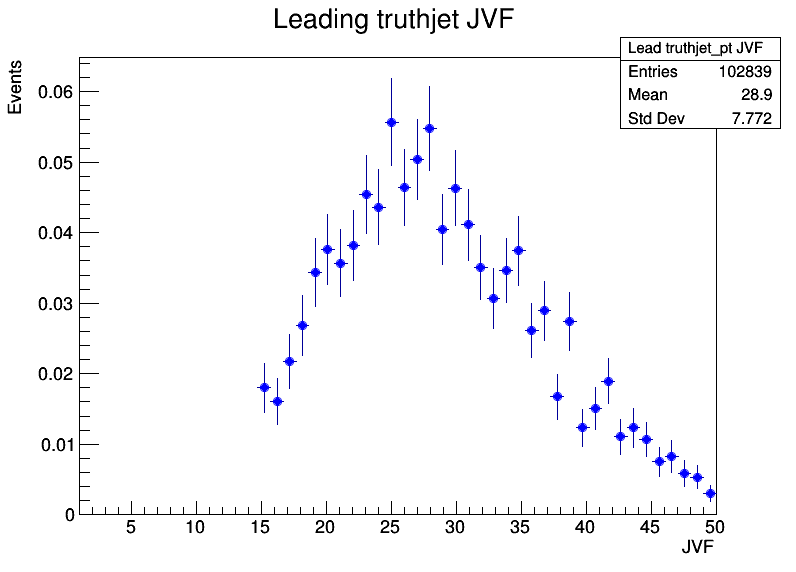

Error in <TH1F::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: Lead truthjet_pt JVF


In [63]:
hi_leadreco_jvf->SetMarkerStyle(20);
hi_leadreco_jvf->SetMarkerColor(kBlue);
hi_leadreco_jvf->DrawNormalized("");
hi_leadreco_jvf2->SetMarkerStyle(20);
hi_leadreco_jvf2->SetMarkerColor(67);
hi_leadreco_jvf2->DrawNormalized("same");
canvas16->Draw();

<b>
    5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup

In [75]:
TH2F *hi_trujet_npv1 = new TH2F("Truth_jet pT JVF NPV", ";NPV; truth jet pt", 50,1,50,20,0,200);
TProfile *pro_trujet_npv1= new TProfile("Profile trujet pT JVF", ";NPV;truth jet pT", 50,1,50,0,200);

Warning in <TFile::Append>: Replacing existing TH1: Truth_jet pT JVF NPV (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Profile trujet pT JVF (Potential memory leak).


In [76]:
int nentries, nbytes;
nentries = (Int_t)tree->GetEntries();

for (int i=0; i <nentries; i++){
    
    nbytes = tree->GetEntry(i);
    
    if(reco_R4_pt->size()>0){
        if(reco_R4_jvf->at(0)>0.5 && reco_R4_jvf->at(0)<0.5){
            
            hi_trujet_npv1->Fill(reco_R4_jvf->at(0), npv,evtw);
            pro_trujet_npv1->Fill(reco_R4_jvf->at(0), npv,evtw);
        }
     
        
    }
    
}
std::cout<<"done"<<std::endl;

done


In [77]:
TCanvas *canvas17 = new TCanvas("canvas17","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas17


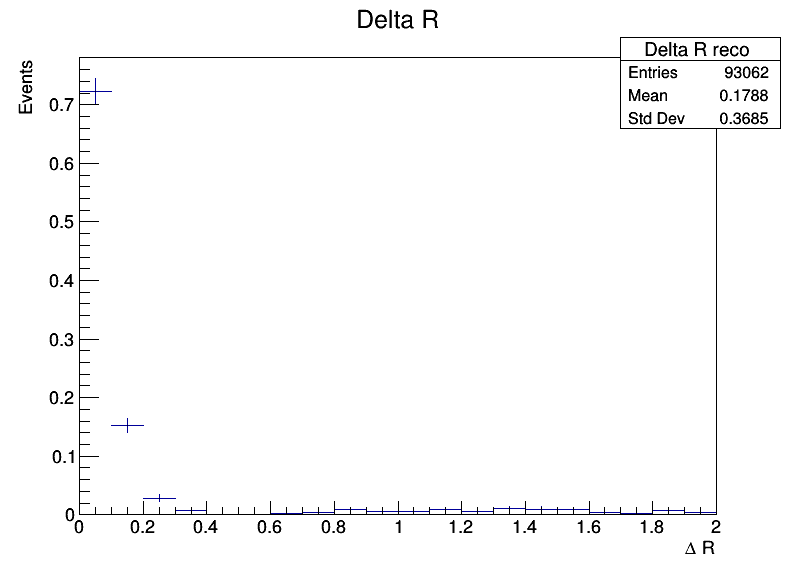

In [78]:
hi_trujet_npv1->Draw("colz");
canvas2->Draw();

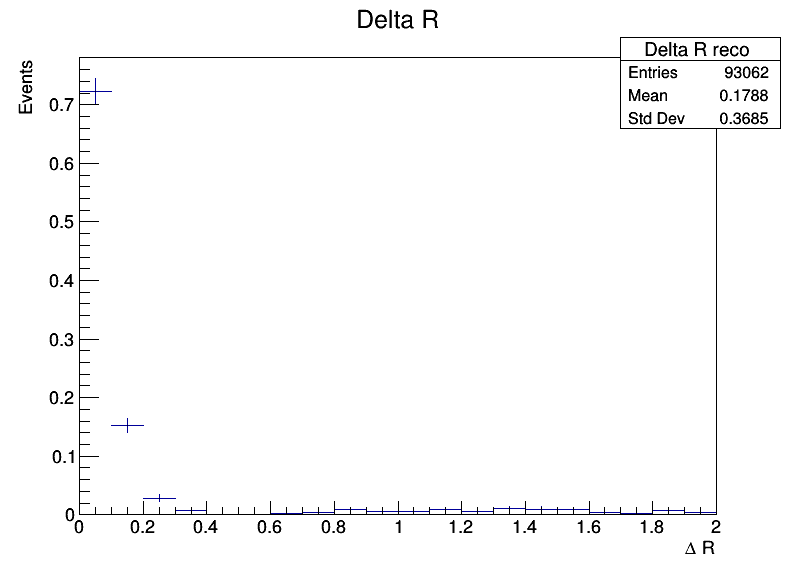

In [79]:
pro_trujet_npv1->Draw("");
canvas2->Draw();

<b>
    6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 

<b>
    7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).

<b>
    8. Investigate the Large-R jets: 
    
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets 
    
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    
    (c) Compare all plots. How can you explain the differences? 
    
    (d) Make the same comparisson for the jet mass.  


In [105]:
TCanvas *canvas20 = new TCanvas("Canvas20","", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas20


In [106]:
vector<float> *reco_r10_pt;
vector<float> *reco_r10_tri;
vector<float> *tru_r10_pt;
vector<float> *tru_r10_tri;

vector<float> *reco_r10_m;
vector<float> *tru_r10_m;


In [107]:
tree->SetBranchAddress("RecoJets_R10_pt", &reco_r10_pt);
tree->SetBranchAddress("RecoJets_R10_Trimmed_pt", &reco_r10_tri);
tree->SetBranchAddress("TruthJets_R10_pt", &tru_r10_pt);
tree->SetBranchAddress("TruthJets_R10_Trimmed_pt", &tru_r10_tri);
tree->SetBranchAddress("RecoJets_R10_m", &reco_r10_m);
tree->SetBranchAddress("TruthJets_R10_m", &tru_r10_m);


In [108]:
TH1F *his_reco10pt = new TH1F("Lead reco R10","Lead reco R10; pT (GeV); Events", 50, 120,400 );
TH1F *his_reco10pt_tri = new TH1F("Lead reco R10 trimmed","Lead reco R10 trimmed; pT (GeV); Events", 50, 10,300 );
TH1F *his_tru10pt = new TH1F("Lead truth R10","Lead truth R10; pT (GeV); Events", 50, 100,400 );
TH1F *his_tru10pt_tri = new TH1F("Lead tru R10 tri","Lead tru R10 tri; pT (GeV); Events", 50, 10,200 );
TH1F *his_reco10_m = new TH1F("Lead reco R10 m","Lead reco R10 m; pT (GeV); Events", 50, 10,400 );
TH1F *his_tru10_m = new TH1F("Lead tru R10 m","Lead tru R10 m; pT (GeV); Events", 50, 10,300 );

Warning in <TFile::Append>: Replacing existing TH1: Lead reco R10 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead reco R10 trimmed (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead truth R10 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead tru R10 tri (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead reco R10 m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead tru R10 m (Potential memory leak).


In [109]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();
for (int i = 0; i<nentries; i++){
    
    nbytes = tree->GetEntry(i);
    if (reco_r10_pt->size()>0){
        his_reco10pt->Fill(reco_r10_pt->at(0)/1000.);
        
    }
    
    if (reco_r10_tri->size()){
        his_reco10pt_tri->Fill(reco_r10_tri->at(0)/1000.);
    }
    
    if (tru_r10_pt->size()>0){
        his_tru10pt->Fill(tru_r10_pt->at(0)/1000.);
    }
    
    if (tru_r10_tri->size()>0){
        his_tru10pt_tri->Fill(tru_r10_tri->at(0)/1000.);    
    }
    
    if (reco_r10_m->size()){
        his_reco10_m->Fill(reco_r10_m->at(0)/1000.);
    }
    
    if (tru_r10_m->size()){
        his_tru10_m->Fill(tru_r10_m->at(0)/1000.);
        
    }
    
    
}

std::cout<<"done"<<std::endl;

done


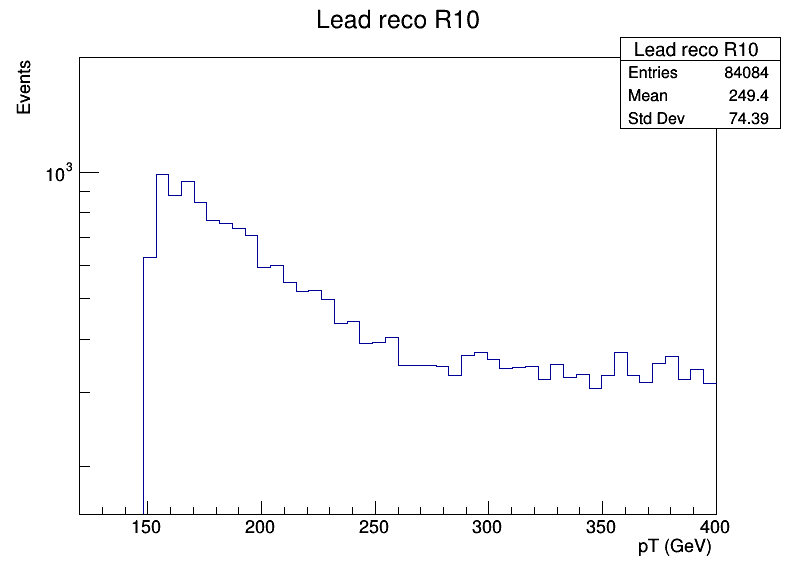

In [110]:
his_reco10pt->SetMarkerStyle(20);
his_reco10pt->SetMarkerColor(12);
his_reco10pt->Draw("");
canvas20->SetLogy();
canvas20->Draw();

In [111]:
TCanvas *canvas21 = new TCanvas("Canvas21","", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas21


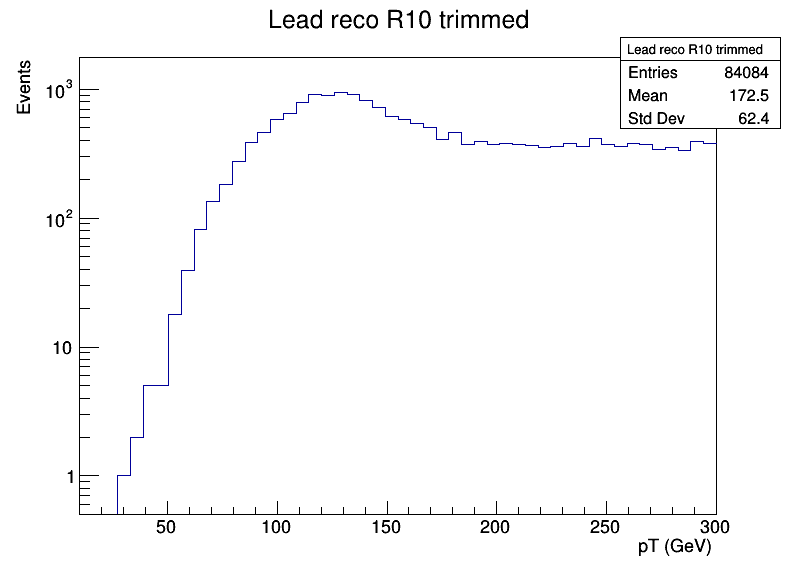

In [112]:
his_reco10pt_tri->SetMarkerStyle(20);
his_reco10pt_tri->SetMarkerColor(22);
his_reco10pt_tri->Draw("");
canvas21->SetLogy();
canvas21->Draw();

In [113]:
TCanvas *canvas22 = new TCanvas("Canvas22","", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas22


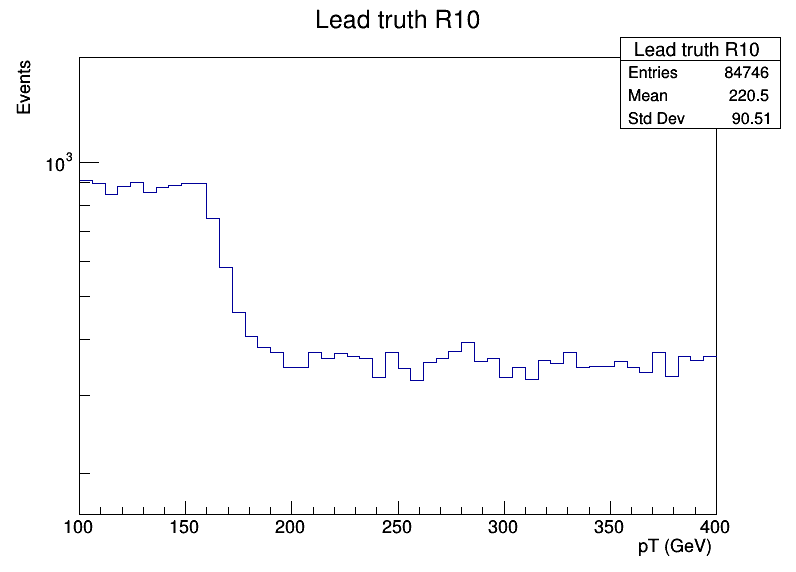

In [114]:
his_tru10pt->SetMarkerStyle(20);
his_tru10pt->SetMarkerColor(22);
his_tru10pt->Draw("");
canvas22->SetLogy();
canvas22->Draw();

In [115]:
TCanvas *canvas23 = new TCanvas("Canvas23","", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas23


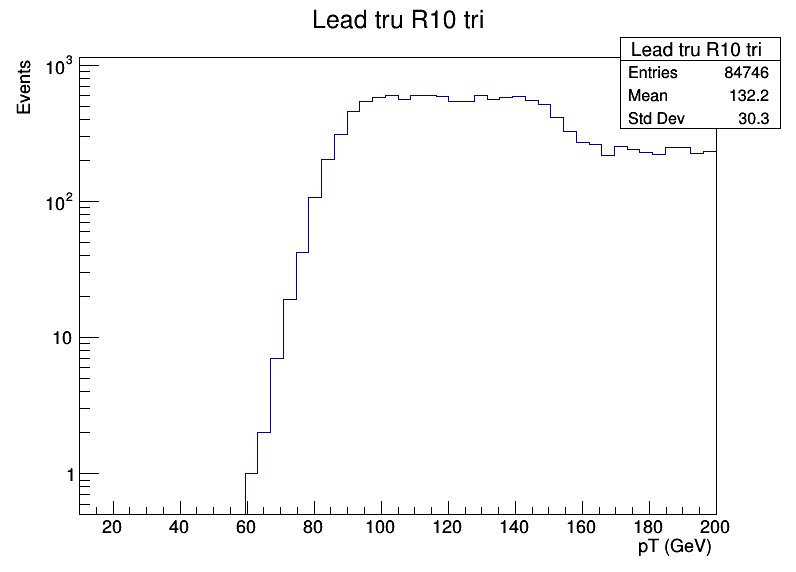

In [116]:
his_tru10pt_tri->SetMarkerStyle(20);
his_tru10pt_tri->SetMarkerColor(22);
his_tru10pt_tri->Draw("");
canvas23->SetLogy();
canvas23->Draw();

In [117]:
TCanvas *canvas24 = new TCanvas("Canvas24","", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas24


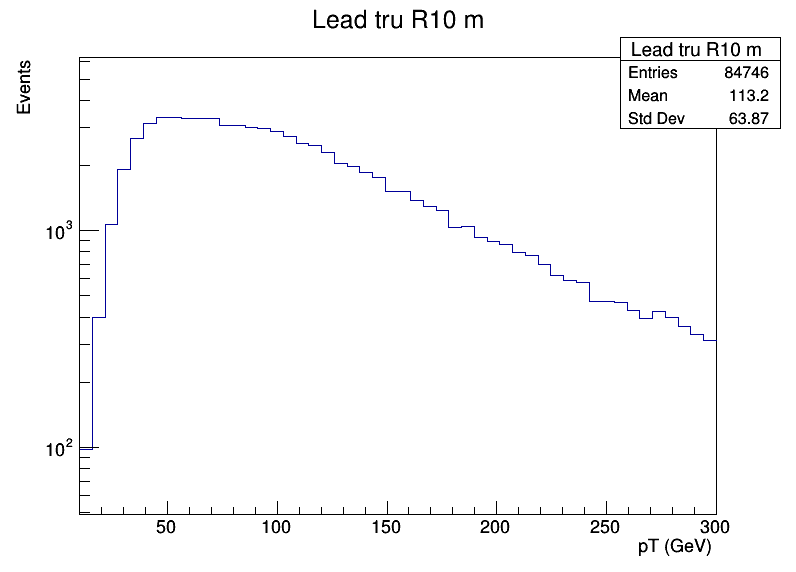

In [118]:
his_tru10_m->SetMarkerStyle(20);
his_tru10_m->SetMarkerColor(22);
his_tru10_m->Draw("");
canvas24->SetLogy();
canvas24->Draw();

In [119]:
TCanvas *canvas25 = new TCanvas("Canvas25","", 800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas25


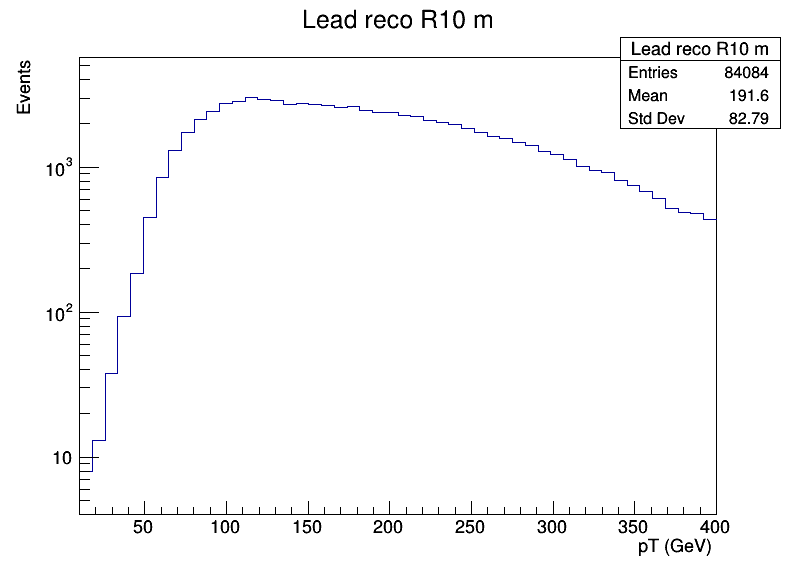

In [120]:
his_reco10_m->SetMarkerStyle(20);
his_reco10_m->SetMarkerColor(22);
his_reco10_m->Draw("");
canvas25->SetLogy();
canvas25->Draw();